<a href="https://colab.research.google.com/github/kkettip/datasci_6_anova/blob/main/datasci_6_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
## bringing in data
from ucimlrepo import fetch_ucirepo

##bring in packages for dataframe + stats
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## for visualization
import matplotlib.pyplot as plt


In [ ]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

Research Question: How do the race of the patient (race) and
their A1C test results (A1Cresult) jointly influence the duration of
their hospital stay (time_in_hospital)?

Factor 1 (Race - race): Caucasian, Asian, African American,
Hispanic, Other

Factor 2 (A1C test result - a1c): >8%, 7%, Normal, None (not
measure)

Dependent Variable: Duration hospital stay (time_in_hospital)

In [ ]:
df = pd.DataFrame(X)
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [ ]:
df = df[['race', 'time_in_hospital', 'A1Cresult']]
df.sample(10)

,race,time_in_hospital,A1Cresult
95691,Caucasian,6,>7
654,Caucasian,4,None
75791,Caucasian,1,None
100431,Caucasian,2,None
30235,AfricanAmerican,2,None
16865,Hispanic,3,None
34361,Caucasian,6,None
19652,Caucasian,5,None
100955,Caucasian,3,None
14215,Caucasian,2,>8


In [ ]:
# df.to_csv('diabetes.csv')

In [ ]:
df = df.dropna()
df.sample(10)

,race,time_in_hospital,A1Cresult
89837,Caucasian,2,None
82422,AfricanAmerican,4,None
75094,Caucasian,2,None
86086,Caucasian,6,None
80627,AfricanAmerican,3,None
97205,Other,5,>7
58514,Caucasian,4,Norm
4133,AfricanAmerican,5,>8
92077,Caucasian,4,None
44503,Caucasian,2,None


In [ ]:
print('Main DV: ', stats.shapiro(df['time_in_hospital']))

Main DV:  ShapiroResult(statistic=0.8867098093032837, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


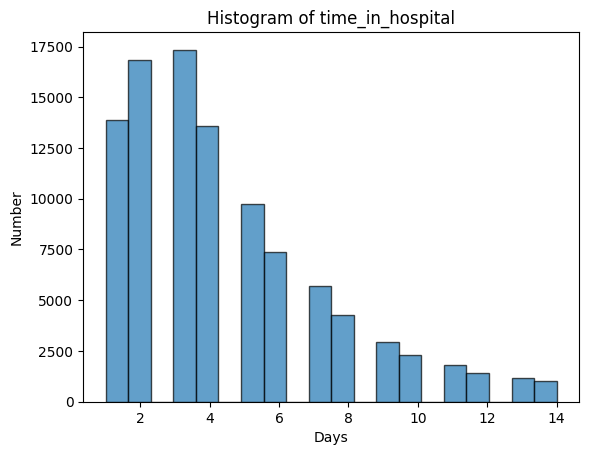

In [ ]:
plt.hist(df['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of time_in_hospital')
plt.xlabel('Days')
plt.ylabel('Number')
plt.show()

**Shapiro-Wilk Test**

In [ ]:
groups = df.groupby(['race', 'A1Cresult'])

for (race, A1Cresult), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race}, {A1Cresult}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Normality**

**Interpretation of Shaprio**

The shapiro tests shows that all groups are not normally distributed with p-values less than 0.05.

**Levene's Test**

In [ ]:
df

,race,time_in_hospital,A1Cresult
0,Caucasian,1,None
1,Caucasian,3,None
2,AfricanAmerican,2,None
3,Caucasian,2,None
4,Caucasian,1,None
...,...,...,...
101761,AfricanAmerican,3,>8
101762,AfricanAmerican,5,None
101763,Caucasian,1,None
101764,Caucasian,10,None


In [ ]:
df['race'] = df['race'].astype(str)
df['A1Cresult'] = df['A1Cresult'].astype(str)

In [ ]:
# Levene's Test
stats.levene(
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'None'],
)


LeveneResult(statistic=7.450102003925798, pvalue=9.580811219790571e-21)

**Homoscedasticity (Equal Variances)**

Interpretation of Levene

Levene test shows that the homogeneity of variance of the different groups are not equal, with a levene test statistic of 7.45 and a p-value equal to 9.580811219790571e-21, which is less than 0.05.

**ANOVA**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols('time_in_hospital ~ C(race) * C(A1Cresult)', data=df).fit()

In [ ]:
# Performing the two-way ANOVA
sm.stats.anova_lm(model, typ=2)
# anova_table = sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(race),641.735130,4.0,18.075566,7.501203e-15
C(A1Cresult),3895.231358,3.0,146.287793,1.363867e-94
C(race):C(A1Cresult),276.823623,12.0,2.599070,1.845652e-03
Residual,882895.150091,99473.0,NaN,NaN


**Interpretation of ANOVA**

ANOVA shows that there is statistical significance between time_in_hospital, A1Cresult and race because the p-value is less than 0.05. The independent variables (race and A1Cresults) have a significant effect on the dependent variable (time_in_hospital).


**Tukey Posthoc**

In [ ]:
# Tukey posthoc:

import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['time_in_hospital'], df['race'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
AfricanAmerican,Asian,-0.5125,0.0002,-0.8396,-0.1855,True
AfricanAmerican,Caucasian,-0.1221,0.0,-0.1879,-0.0564,True
AfricanAmerican,Hispanic,-0.448,0.0,-0.6378,-0.2582,True
AfricanAmerican,Other,-0.2343,0.0278,-0.4523,-0.0163,True
Asian,Caucasian,0.3904,0.0087,0.0673,0.7135,True
Asian,Hispanic,0.0646,0.9894,-0.3043,0.4335,False
Asian,Other,0.2783,0.2778,-0.1059,0.6624,False
Caucasian,Hispanic,-0.3258,0.0,-0.5087,-0.143,True
Caucasian,Other,-0.1121,0.5995,-0.3241,0.0998,False
Hispanic,Other,0.2137,0.2175,-0.0631,0.4905,False


Tukey posthoc shows that there is a statistical significance in the difference between the different groups of races and time_in_hospital except between the race groups: Asian and Hispanic, Asian and Other, Caucasian and Other, and Hispanic and Other.

In [ ]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['time_in_hospital'], df['A1Cresult'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
>7,>8,-0.157,0.0397,-0.3089,-0.0051,True
>7,None,-0.588,0.0,-0.7162,-0.4598,True
>7,Norm,0.0238,0.983,-0.1425,0.1902,False
>8,None,-0.431,0.0,-0.5209,-0.3412,True
>8,Norm,0.1808,0.0046,0.0418,0.3198,True
None,Norm,0.6118,0.0,0.4993,0.7243,True


Tukey posthoc shows that there is a statistical significance in the difference between the different groups of A1Cresult and time_in_hospital except between the A1Cresult group >7 and Norm.